# 1. 데이터 전처리

In [2]:
import pandas as pd
import numpy as np

In [3]:
df = pd.read_excel("C:/Python_practice/DL_project/gwangjin_contest/광진구_데이터프레임_230425.xlsx", index_col=False)

In [4]:
df.head(3)

,Unnamed: 0,지번주소,도로명주소,위도,경도,소지역코드,인구밀도,총 사업체수,반경 1km 이내 불법주정차 단속 수,주차장과의최단거리,토지면적,공시지가_기준년월,공시지가(원/면적),지하철이름,역과의최단거리,반경 1km 이내 주차장수
0,0,서울특별시 광진구 광장동 102,서울특별시 광진구 아차산로78길 75 (광장동),37.551618,127.110947,11050630020301,7067.7,136,2,51,2211.8,2022년01월,6324000.0,광나루역,1144,41
1,1,서울특별시 광진구 광장동 104,서울특별시 광진구 아차산로78길 67 (광장동),37.551729,127.110622,11050630020301,7067.7,136,2,21,172.1,2022년07월,5097000.0,광나루역,1166,41
2,2,서울특별시 광진구 광장동 105,"서울특별시 광진구 아차산로78길 63 (광장동, 워커힐현대빌)",37.551755,127.110362,11050630020301,7067.7,136,2,3,848.8,2022년01월,5202000.0,광나루역,1068,41


### 1) 필요없는 데이터 drop

In [5]:
# index = 지번으로 설정
df.set_index('지번주소', inplace = True)

# 미사용 columns 제거
df.drop(columns=["도로명주소","위도","경도","소지역코드", "Unnamed: 0", "지하철이름"], inplace = True)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 23216 entries, 서울특별시 광진구 광장동  102 to 서울특별시 광진구 화양동  99
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   인구밀도                  23216 non-null  float64
 1   총 사업체수                23216 non-null  int64  
 2   반경 1km 이내 불법주정차 단속 수  23216 non-null  int64  
 3   주차장과의최단거리             23216 non-null  int64  
 4   토지면적                  23216 non-null  object 
 5   공시지가_기준년월             23213 non-null  object 
 6   공시지가(원/면적)            23213 non-null  float64
 7   역과의최단거리               23216 non-null  int64  
 8   반경 1km 이내 주차장수        23216 non-null  int64  
dtypes: float64(2), int64(5), object(2)
memory usage: 1.8+ MB


### 2) 결측치 삭제

In [7]:
# 결측치 3개로 삭제 진행
df.dropna(inplace = True)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 23213 entries, 서울특별시 광진구 광장동  102 to 서울특별시 광진구 화양동  99
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   인구밀도                  23213 non-null  float64
 1   총 사업체수                23213 non-null  int64  
 2   반경 1km 이내 불법주정차 단속 수  23213 non-null  int64  
 3   주차장과의최단거리             23213 non-null  int64  
 4   토지면적                  23213 non-null  object 
 5   공시지가_기준년월             23213 non-null  object 
 6   공시지가(원/면적)            23213 non-null  float64
 7   역과의최단거리               23213 non-null  int64  
 8   반경 1km 이내 주차장수        23213 non-null  int64  
dtypes: float64(2), int64(5), object(2)
memory usage: 1.8+ MB


### 3) 타입 변환

**[1] int형, float형 변수 더블 체크**

In [10]:
# 인구밀도, 토지면적, 공시지가(원/면적) : float
# 총 사업체수, 반경 1km 이내 불법주정차 단속 수, 주차장과의최단거리, 역과의최단거리, 반경 1km 이내 주차장수  : int
# to_numeric : series에만 적용 => astpye 사용

df[['인구밀도', '토지면적', '공시지가(원/면적)']] = df[['인구밀도', '토지면적', '공시지가(원/면적)']].astype(float)
df[['총 사업체수', '반경 1km 이내 불법주정차 단속 수', '주차장과의최단거리', '역과의최단거리', '반경 1km 이내 주차장수']] = df[['총 사업체수', '반경 1km 이내 불법주정차 단속 수', '주차장과의최단거리', '역과의최단거리', '반경 1km 이내 주차장수']].astype(int)

**[2] 공시지가_기준년월 : 원핫인코딩(범주형 변수 -> 숫자로 변경)** <br>
- 원핫인코딩 = 더미변수화(dummy variable)

In [11]:
train_df = pd.get_dummies(df, columns = ['공시지가_기준년월'])
train_df

,인구밀도,총 사업체수,반경 1km 이내 불법주정차 단속 수,주차장과의최단거리,토지면적,공시지가(원/면적),역과의최단거리,반경 1km 이내 주차장수,공시지가_기준년월_2013년01월,공시지가_기준년월_2014년01월,공시지가_기준년월_2015년01월,공시지가_기준년월_2016년01월,공시지가_기준년월_2022년01월,공시지가_기준년월_2022년07월
지번주소,,,,,,,,,,,,,,
서울특별시 광진구 광장동 102,7067.7,136,2,51,2211.8,6324000.0,1144,41,0,0,0,0,1,0
서울특별시 광진구 광장동 104,7067.7,136,2,21,172.1,5097000.0,1166,41,0,0,0,0,0,1
서울특별시 광진구 광장동 105,7067.7,136,2,3,848.8,5202000.0,1068,41,0,0,0,0,1,0
서울특별시 광진구 광장동 106,7067.7,136,2,27,452.8,5097000.0,1038,41,0,0,0,0,1,0
서울특별시 광진구 광장동 107,7067.7,136,2,50,403.9,5793000.0,1011,42,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
서울특별시 광진구 화양동 95-5,52366.1,44,28,44,152.0,4346000.0,630,75,0,0,0,0,1,0
서울특별시 광진구 화양동 96-2,52366.1,44,31,52,165.0,4346000.0,630,75,0,0,0,0,1,0
서울특별시 광진구 화양동 97,52366.1,44,28,54,188.0,5095000.0,633,74,0,0,0,0,1,0


# 2. EDA

### 1) 기초통계량 확인
- 최소값이 0인 부분은 그대로 진행

In [12]:
# 기초통계량 확인하기
df.describe()

,인구밀도,총 사업체수,반경 1km 이내 불법주정차 단속 수,주차장과의최단거리,토지면적,공시지가(원/면적),역과의최단거리,반경 1km 이내 주차장수
count,23213.000000,23213.000000,23213.000000,23213.000000,23213.000000,2.321300e+04,23213.000000,23213.000000
mean,34900.199065,66.497480,21.409555,85.701590,360.372390,5.188785e+06,697.772326,94.107698
std,14909.802802,75.688845,8.303961,55.804366,3905.284235,1.905761e+06,307.986961,32.106868
min,0.000000,0.000000,2.000000,0.000000,1.000000,2.900000e+04,6.000000,14.000000
25%,24129.400000,27.000000,15.000000,43.000000,125.500000,4.186000e+06,480.000000,68.000000
50%,36796.500000,48.000000,22.000000,75.000000,162.600000,4.905000e+06,660.000000,93.000000
75%,46032.500000,79.000000,28.000000,116.000000,217.500000,5.647000e+06,864.000000,116.000000
max,138678.800000,1448.000000,45.000000,455.000000,501359.000000,4.750000e+07,1907.000000,174.000000


In [11]:
# 인구밀도가 0인 모든 행의 인덱스 찾기
print(df[df['인구밀도'] == 0].index)

# 총 사업체 수가 0인 모든 행의 인덱스 찾기
print(df[df['총 사업체수'] == 0].index)

# 주차장과의 최단거리가 0인 모든 행의 인덱스 찾기
print(df[df['주차장과의최단거리'] == 0].index)

Index(['서울특별시 광진구 구의동 623-1', '서울특별시 광진구 구의동 629', '서울특별시 광진구 구의동 630',
       '서울특별시 광진구 화양동 303-18', '서울특별시 광진구 화양동 303-9'],
      dtype='object', name='지번주소')
Index(['서울특별시 광진구 광장동 226'], dtype='object', name='지번주소')
Index(['서울특별시 광진구 광장동 130', '서울특별시 광진구 광장동 334-2', '서울특별시 광진구 광장동 376-4',
       '서울특별시 광진구 구의동 592-2', '서울특별시 광진구 구의동 612-15', '서울특별시 광진구 구의동 69-7',
       '서울특별시 광진구 자양동 195-10', '서울특별시 광진구 자양동 202-18', '서울특별시 광진구 자양동 23-2',
       '서울특별시 광진구 자양동 653-26', '서울특별시 광진구 자양동 659-25', '서울특별시 광진구 자양동 659-26',
       '서울특별시 광진구 자양동 660-25', '서울특별시 광진구 자양동 685-25', '서울특별시 광진구 자양동 686-4',
       '서울특별시 광진구 자양동 686-46', '서울특별시 광진구 자양동 687-22', '서울특별시 광진구 중곡동 126-28',
       '서울특별시 광진구 중곡동 127-5', '서울특별시 광진구 중곡동 128-10', '서울특별시 광진구 중곡동 169-100',
       '서울특별시 광진구 중곡동 169-58', '서울특별시 광진구 중곡동 171-18', '서울특별시 광진구 중곡동 171-26',
       '서울특별시 광진구 중곡동 172-5', '서울특별시 광진구 중곡동 172-8', '서울특별시 광진구 중곡동 173-22',
       '서울특별시 광진구 중곡동 19-1', '서울특별시 광진구 중곡동 190-30', '서울특별시 광진구 중곡동 199-2',
      

In [13]:
(df[df['주차장과의최단거리'] == 0]).count()

인구밀도                    65
총 사업체수                  65
반경 1km 이내 불법주정차 단속 수    65
주차장과의최단거리               65
토지면적                    65
공시지가_기준년월               65
공시지가(원/면적)              65
역과의최단거리                 65
반경 1km 이내 주차장수          65
dtype: int64

### 2) 그래프를 통한 이상치, 상관관계, 정규성 확인

In [15]:
# 글씨 지정
import matplotlib.font_manager as font_manager
import matplotlib as mpl

# Add every font at the specified location
font_dir = ['C:/Windows/Fonts']    # 수정할 곳
for font in font_manager.findSystemFonts(fontpaths=font_dir):
# 시스템 문자 사용하고 싶으면 font_dir을 None로 변경한 후 시스템의 폰트 중 하나를 내 폰트에 넣기
    print(mpl.font_manager.FontProperties(fname=font).get_name())
    font_manager.fontManager.addfont(font)

# Set font family globally
mpl.rcParams['font.family'] = 'NanumBarunGothic'   # 내 폰트

print(mpl.rcParams['font.family'])

Franklin Gothic Book
Georgia
Garamond
Franklin Gothic Medium
Courier New
Perpetua Titling MT
Times New Roman
MoeumT R
Times New Roman
Sylfaen
Pyunji R
Century Gothic
Tw Cen MT
Candara
Verdana
Segoe Script
Gill Sans MT
Colonna MT
Book Antiqua
Lucida Bright
Perpetua
KoPubBatang Medium
Gill Sans Ultra Bold Condensed
Segoe UI
Broadway
UnDotum
Sitka Small
Times New Roman
HYShortSamul-Medium
Imprint MT Shadow
Impact
Arial Rounded MT Bold
Verdana
Yet R
Palatino Linotype
Malgun Gothic
Arial
Onyx
Arial
Consolas
Algerian
Candara
Berlin Sans FB
Microsoft JhengHei
HYGraphic-Medium
Mongolian Baiti
Script MT Bold
Papyrus
Tw Cen MT
Book Antiqua
Bodoni MT
Franklin Gothic Heavy
Agency FB
Copperplate Gothic Bold
Freestyle Script
MS Reference Specialty
Informal Roman
Candara
Lucida Console
Calisto MT
Palace Script MT
Bookman Old Style
Yu Gothic
Segoe Print
Rockwell
Constantia
Times New Roman
Courier New
KoPubDotum Light
Lucida Bright
Lucida Sans Typewriter
Calibri
Candara
NanumMyeongjo
MT Extra
Lucida Sa

**[1] 이상치 확인 <br>**
<br>
공시지가는 땅값으로 많은 이상치를 제거하기보다는 <br>
이상치에 덜 민감한 비선형 차원축소 후 -> DBSCAN의 종류인 Mean Shift, OPTICS 진행<br>
단, 이상치가 클러스터링 결과에 영향

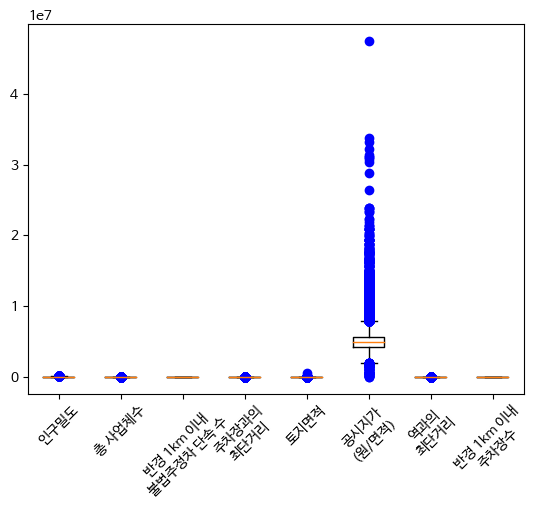

In [17]:
# 박스 플롯
import matplotlib.pyplot as plt
import seaborn as sns

fig, ax = plt.subplots()
ax.boxplot([df['인구밀도'], df['총 사업체수'], df['반경 1km 이내 불법주정차 단속 수'], df['주차장과의최단거리'], 
            df['토지면적'], df['공시지가(원/면적)'], df['역과의최단거리'], df['반경 1km 이내 주차장수']], 
            sym='bo') # 이상치를 파란색 원으로 표시 ('b' : 파란색(Blue) | 'o' : 원(Circle) 모양)

plt.xticks(range(1, 9), ['인구밀도', '총 사업체수','반경 1km 이내\n불법주정차 단속 수', '주차장과의\n최단거리', 
                        '토지면적', '공시지가\n(원/면적)', '역과의\n최단거리', '반경 1km 이내\n주차장수'], rotation=45)
plt.show()

**[2] 독립변수 간 상관 관계**

- 상관 계수(r)

In [18]:
df.corr()

,인구밀도,총 사업체수,반경 1km 이내 불법주정차 단속 수,주차장과의최단거리,토지면적,공시지가(원/면적),역과의최단거리,반경 1km 이내 주차장수
인구밀도,1.000000,-0.495450,0.054875,-0.038844,-0.038888,-0.186246,0.073263,0.071007
총 사업체수,-0.495450,1.000000,0.114137,0.010710,0.032725,0.362329,-0.151207,-0.033017
반경 1km 이내 불법주정차 단속 수,0.054875,0.114137,1.000000,0.082597,-0.005224,0.125316,-0.228183,0.197031
주차장과의최단거리,-0.038844,0.010710,0.082597,1.000000,0.067831,0.016156,0.017939,-0.271243
토지면적,-0.038888,0.032725,-0.005224,0.067831,1.000000,-0.000519,0.012605,-0.029514
공시지가(원/면적),-0.186246,0.362329,0.125316,0.016156,-0.000519,1.000000,-0.090569,-0.065261
역과의최단거리,0.073263,-0.151207,-0.228183,0.017939,0.012605,-0.090569,1.000000,0.016579
반경 1km 이내 주차장수,0.071007,-0.033017,0.197031,-0.271243,-0.029514,-0.065261,0.016579,1.000000


- 독립 변수 간 상관관계 (히트맵)

c:\Users\dohee\anaconda3\lib\site-packages\seaborn\utils.py:95: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.draw()
c:\Users\dohee\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


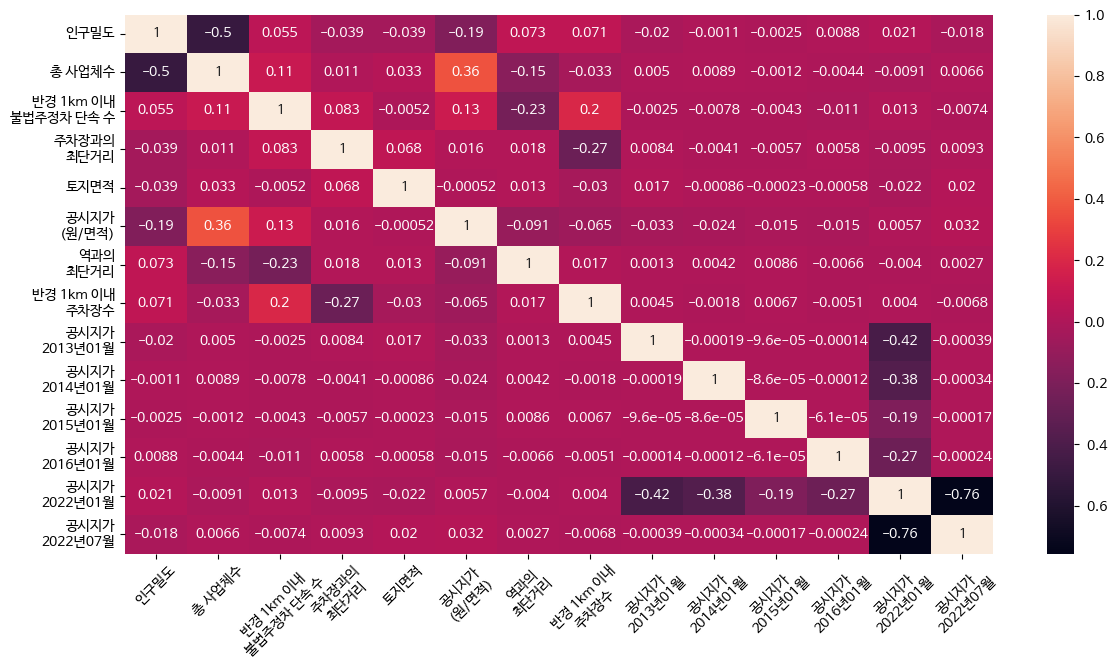

In [19]:
features = ['인구밀도', '총 사업체수','반경 1km 이내 불법주정차 단속 수', '주차장과의최단거리', '토지면적',
            '공시지가(원/면적)', '역과의최단거리', '반경 1km 이내 주차장수',
            '공시지가_기준년월_2013년01월', '공시지가_기준년월_2014년01월', '공시지가_기준년월_2015년01월',
            '공시지가_기준년월_2016년01월', '공시지가_기준년월_2022년01월', '공시지가_기준년월_2022년07월']
corr_df = train_df[features].corr()

plt.figure(figsize=(14, 7))  # 크기 조절 (가로, 세로)
sns.heatmap(corr_df, annot = True)

tick_labels = ['인구밀도', '총 사업체수', '반경 1km 이내\n불법주정차 단속 수', '주차장과의\n최단거리', '토지면적', 
               '공시지가\n(원/면적)', '역과의\n최단거리', '반경 1km 이내\n주차장수',
                '공시지가\n2013년01월', '공시지가\n2014년01월', '공시지가\n2015년01월', '공시지가\n2016년01월',
                '공시지가\n2022년01월', '공시지가\n2022년07월']
tick_positions = np.arange(0.5, len(tick_labels), 1)

plt.xticks(tick_positions, tick_labels, rotation=45)
plt.yticks(tick_positions, tick_labels)
plt.show()

In [20]:
# 상관계수 행렬 계산
corr_matrix = train_df.corr()

# 대각선을 제외한 상관계수의 최대값과 최소값 계산
max_corr = np.max(corr_matrix.values[np.triu_indices(len(corr_matrix), k=1)])
min_corr = np.min(corr_matrix.values[np.triu_indices(len(corr_matrix), k=1)])
print(f'최대값 : {max_corr}, 최소값 : {min_corr}')

# 가장 큰 값과 가장 작은 값의 차이 계산
diff_corr = np.abs(max_corr - min_corr)

# 차이가 0.5보다 크면 비선형 데이터, 작으면 선형 데이터로 간주
if diff_corr > 0.5:
    print("비선형 데이터입니다.")
else:
    print("선형 데이터입니다.")

최대값 : 0.3623291496114795, 최소값 : -0.7557333965767041
비선형 데이터입니다.


**< 히트맵 결과 >**<br>
가. 총 사업체수 - 인구밀도 : -0.5<br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;=> 두 변수 모두 모델이나 분석에 중요하여 **두 변수를 모두 사용** <br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;=> 음의 상관관계가 있는 변수들은 분석 결과를 더욱 견고하게 만드는데 도움이 될 수 있음 <br>

나. 공시지가 2022년 01월 - 공시지가 2022년07월 : -0.76 <br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;=> 땅값 최신업데이트 날짜로 **독립변수 그대로 사용**

다. 선형관계 확인<br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;**독립변수 간의 상관관계가 낮으며**, **상관계수의 최대값-최소값의 결과가 0.5 보다 컸으므로**<br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;**비선형 데이터**라고 볼 수 있음<br>
<br>
&nbsp;&nbsp;&nbsp;** 선형 데이터의 경우, 변수 간에 선형적인 관계가 있으므로 => 상관계수가 높게 나타남
<hr>

- 독립-종속 변수 간 상관관계 분석 (히트맵) : 지번과 각 열과의 상관관계는 확인 필요 없음<br>
<br>
<hr>

**[3] 산점도 : 불필요**
- 이유 : 산점도는 두 변수 사이의 관계를 나타내는 2차원 그래프로, <br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;**y(지번주소)와 x(각 독립변수)간의 관계를 나타내기 때문**에 <br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;~**지번주소와 각 열과의 관계는 확인할 필요 없음**
<br>
<hr>

**[4] 산점도 행렬**
- 여러 변수 간의 관계를 한 번에 시각화하는 방법
- 상관 관계, 이상치, 패턴 파악 가능

c:\Users\dohee\anaconda3\lib\site-packages\seaborn\axisgrid.py:88: UserWarning: Glyph 51064 (\N{HANGUL SYLLABLE IN}) missing from current font.
  self._figure.tight_layout(*args, **kwargs)
c:\Users\dohee\anaconda3\lib\site-packages\seaborn\axisgrid.py:88: UserWarning: Glyph 44396 (\N{HANGUL SYLLABLE GU}) missing from current font.
  self._figure.tight_layout(*args, **kwargs)
c:\Users\dohee\anaconda3\lib\site-packages\seaborn\axisgrid.py:88: UserWarning: Glyph 48128 (\N{HANGUL SYLLABLE MIL}) missing from current font.
  self._figure.tight_layout(*args, **kwargs)
c:\Users\dohee\anaconda3\lib\site-packages\seaborn\axisgrid.py:88: UserWarning: Glyph 46020 (\N{HANGUL SYLLABLE DO}) missing from current font.
  self._figure.tight_layout(*args, **kwargs)
c:\Users\dohee\anaconda3\lib\site-packages\seaborn\axisgrid.py:88: UserWarning: Glyph 52509 (\N{HANGUL SYLLABLE CONG}) missing from current font.
  self._figure.tight_layout(*args, **kwargs)
c:\Users\dohee\anaconda3\lib\site-packages\seaborn\a

c:\Users\dohee\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 51064 (\N{HANGUL SYLLABLE IN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\dohee\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 44396 (\N{HANGUL SYLLABLE GU}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\dohee\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 48128 (\N{HANGUL SYLLABLE MIL}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\dohee\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 46020 (\N{HANGUL SYLLABLE DO}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\dohee\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 52509 (\N{HANGUL SYLLABLE CONG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\dohee\anaconda3\li

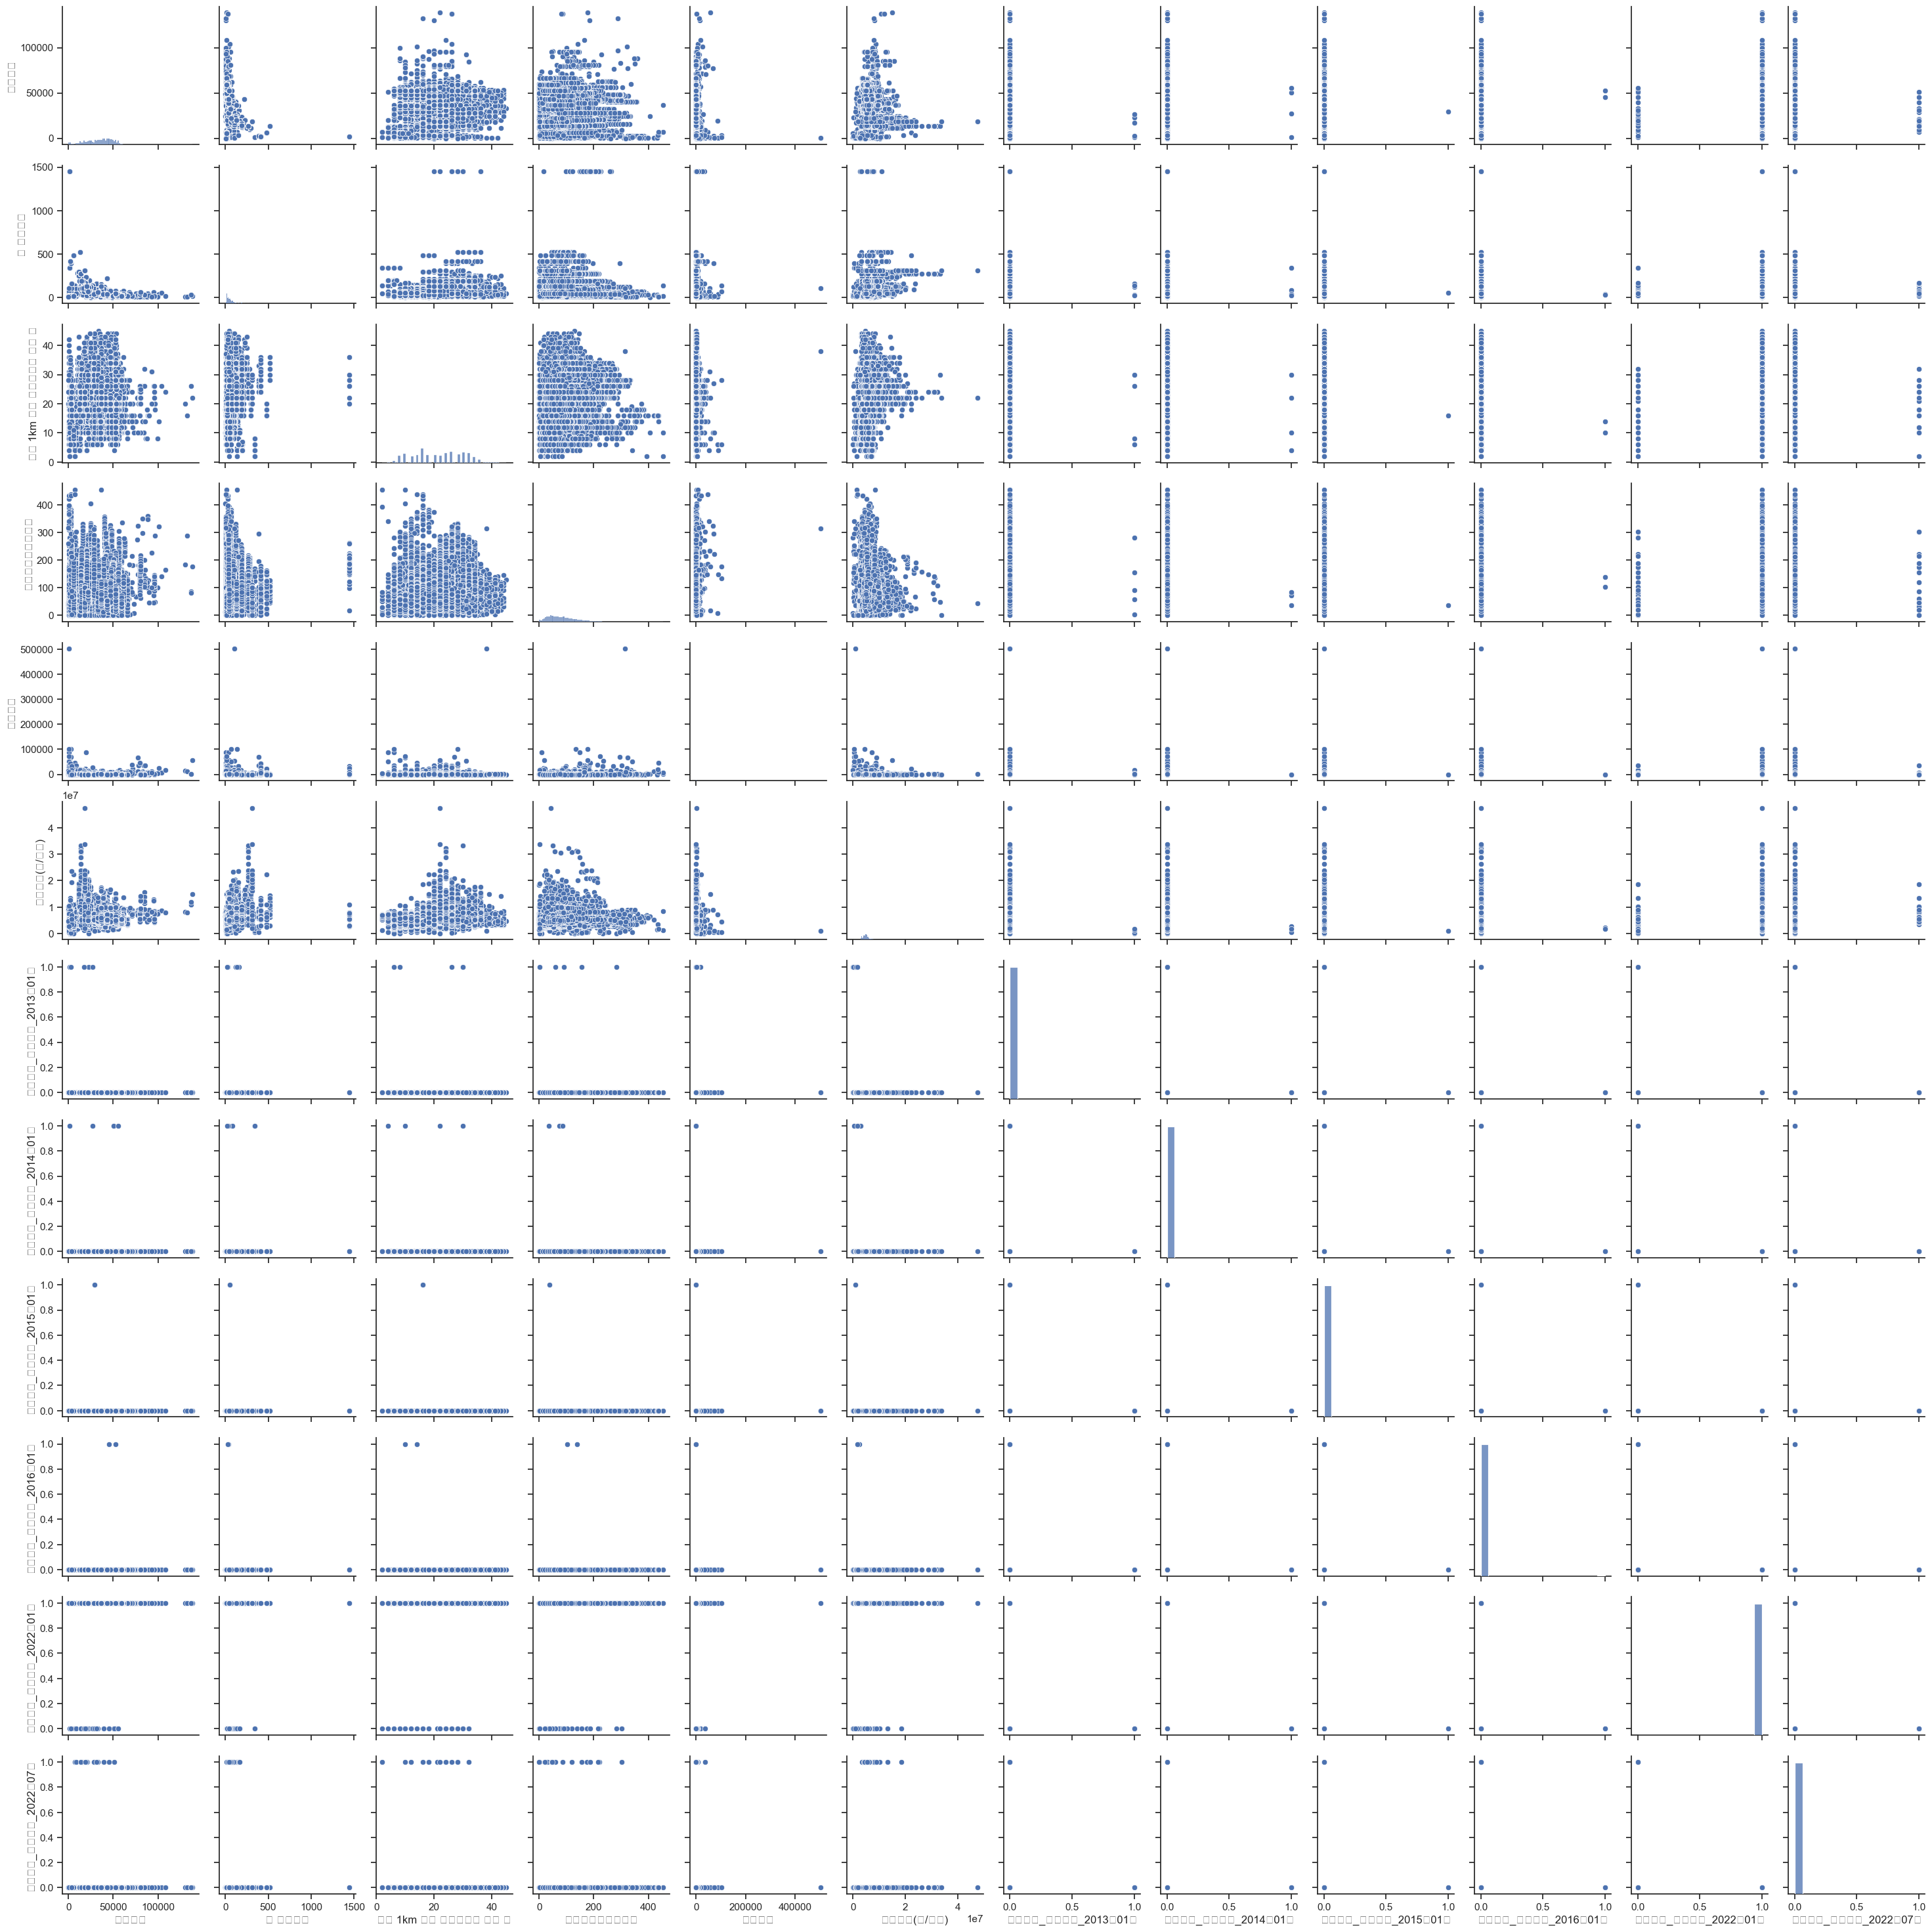

In [77]:
# 산점도 행렬 그리기
sns.set(style="ticks")
sns.pairplot(train_df)

c:\Users\dohee\anaconda3\lib\site-packages\seaborn\axisgrid.py:88: UserWarning: Glyph 51064 (\N{HANGUL SYLLABLE IN}) missing from current font.
  self._figure.tight_layout(*args, **kwargs)
c:\Users\dohee\anaconda3\lib\site-packages\seaborn\axisgrid.py:88: UserWarning: Glyph 44396 (\N{HANGUL SYLLABLE GU}) missing from current font.
  self._figure.tight_layout(*args, **kwargs)
c:\Users\dohee\anaconda3\lib\site-packages\seaborn\axisgrid.py:88: UserWarning: Glyph 48128 (\N{HANGUL SYLLABLE MIL}) missing from current font.
  self._figure.tight_layout(*args, **kwargs)
c:\Users\dohee\anaconda3\lib\site-packages\seaborn\axisgrid.py:88: UserWarning: Glyph 46020 (\N{HANGUL SYLLABLE DO}) missing from current font.
  self._figure.tight_layout(*args, **kwargs)
c:\Users\dohee\anaconda3\lib\site-packages\seaborn\axisgrid.py:88: UserWarning: Glyph 52509 (\N{HANGUL SYLLABLE CONG}) missing from current font.
  self._figure.tight_layout(*args, **kwargs)
c:\Users\dohee\anaconda3\lib\site-packages\seaborn\a

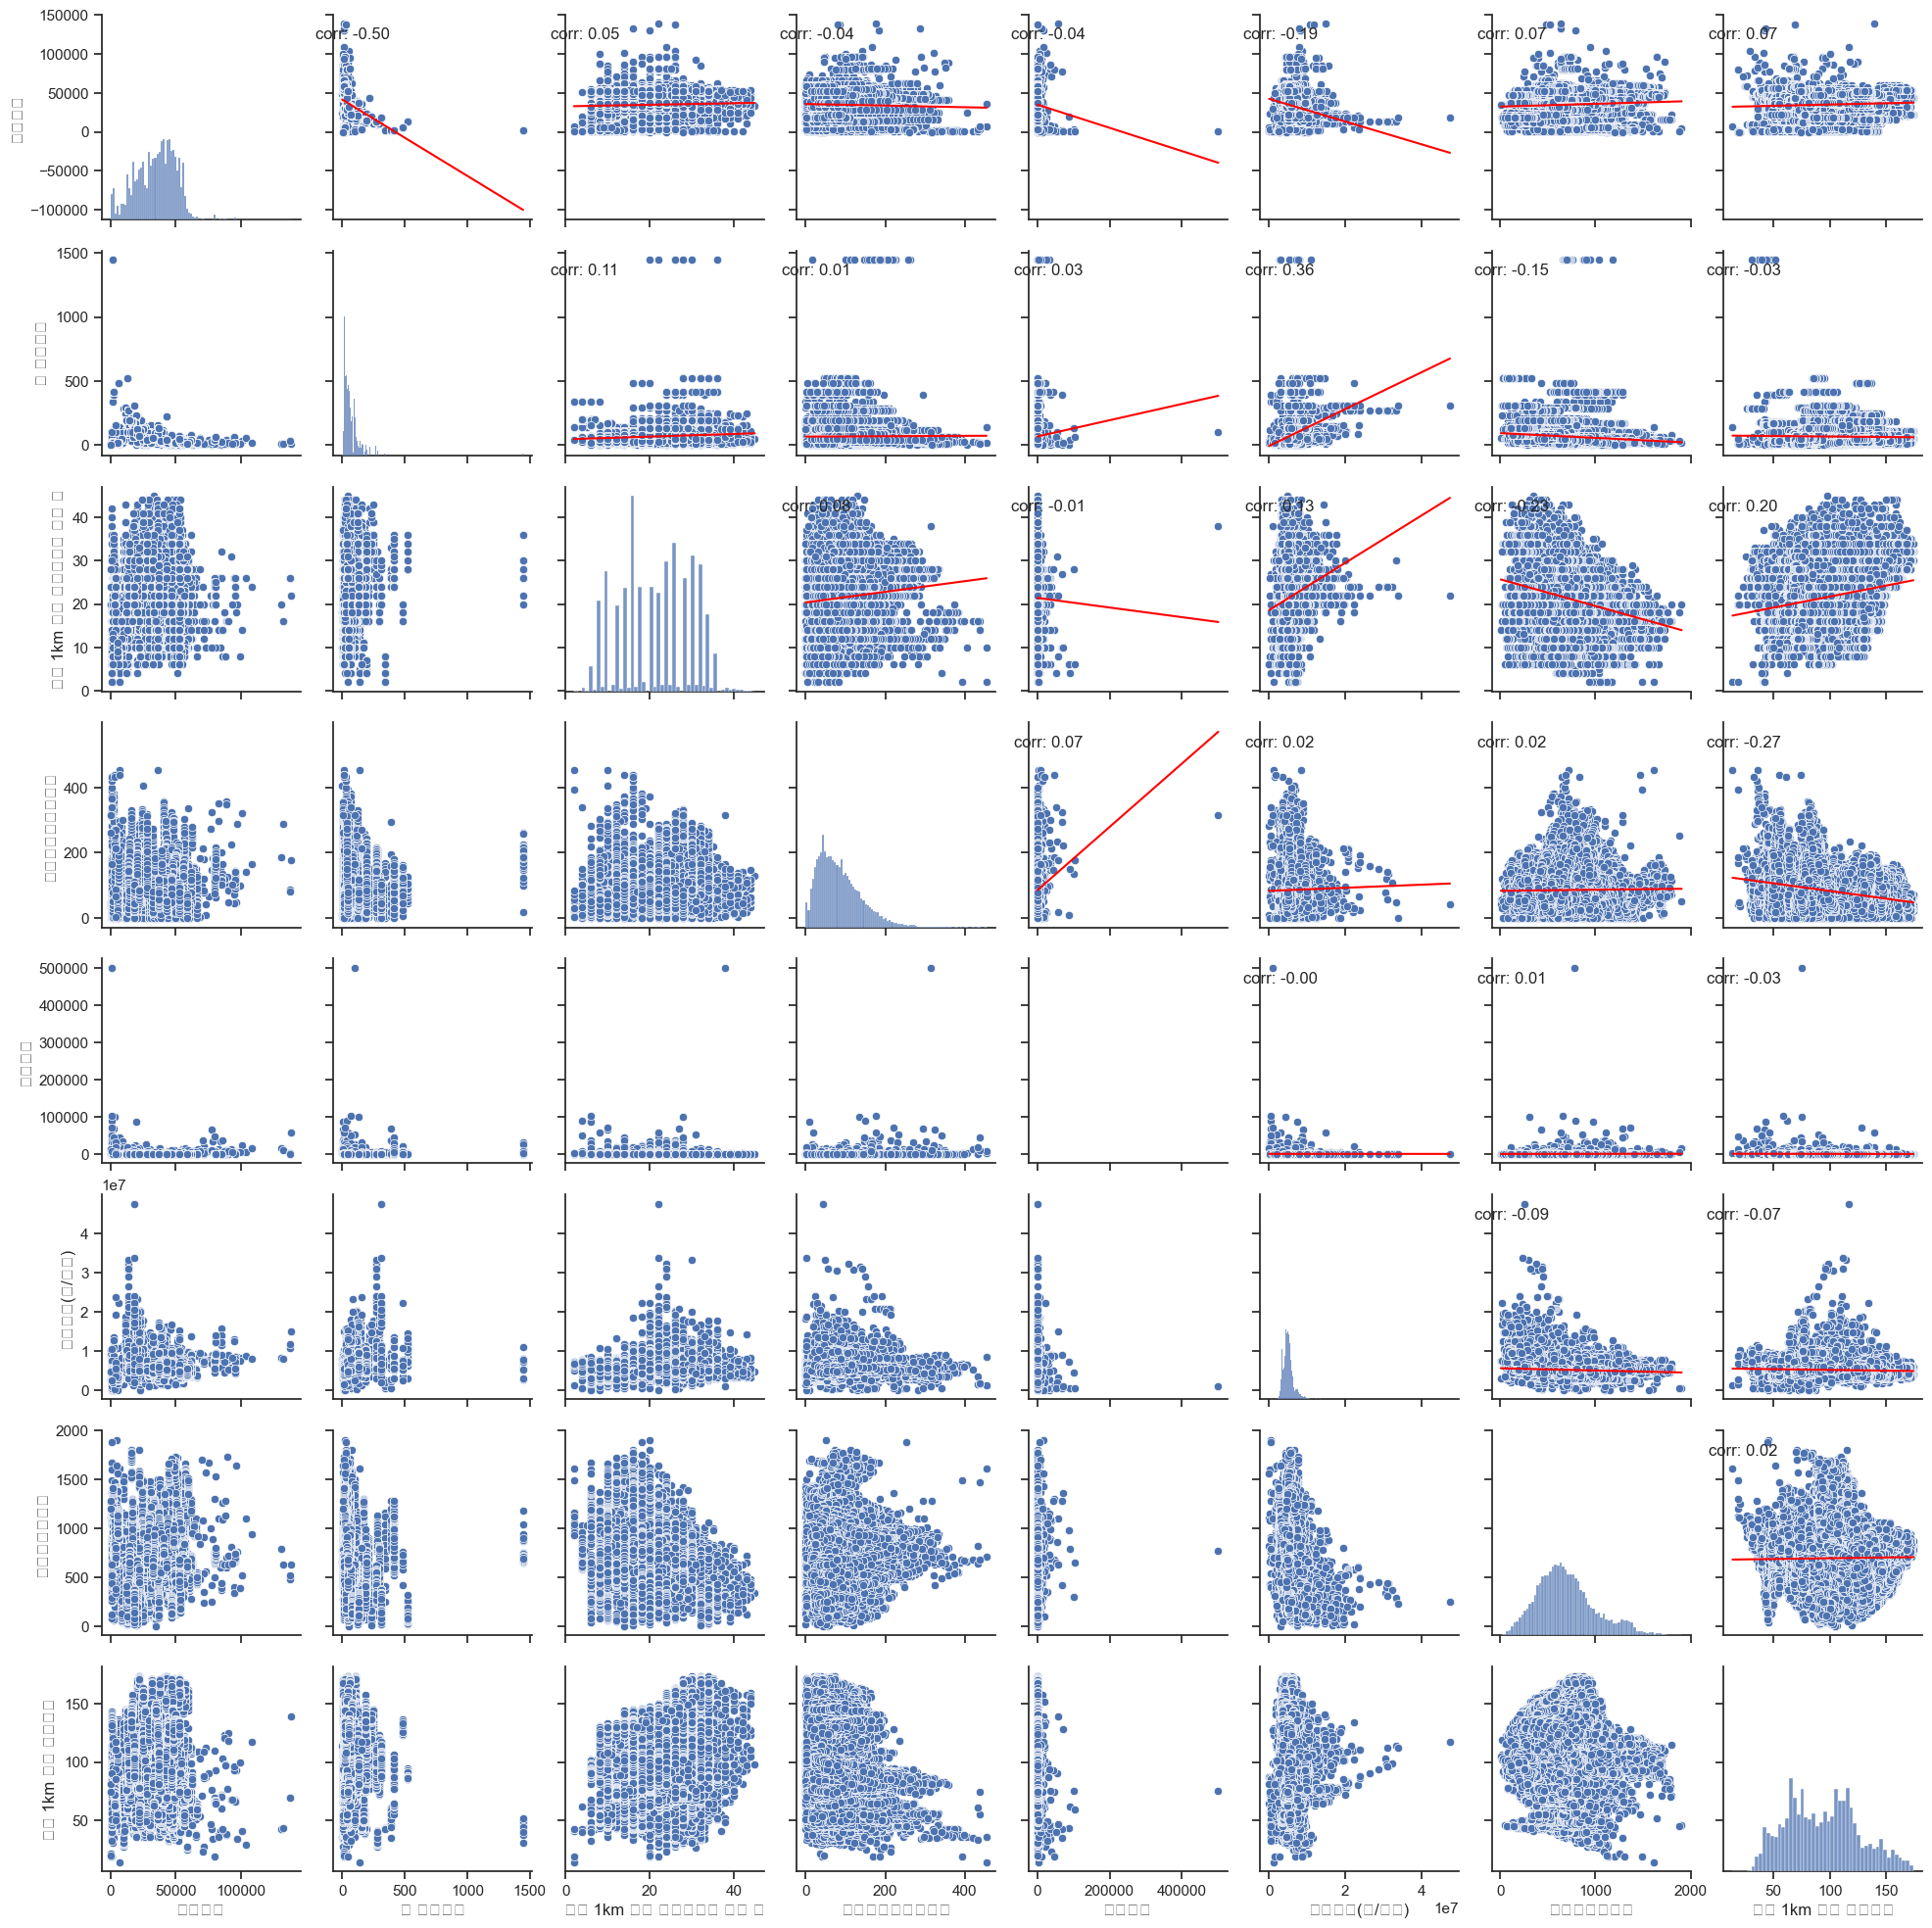

In [21]:
# 기준년월 제외한 산점도 행렬 그리기

# features 리스트의 열들만으로 이루어진 데이터프레임 생성
graph_df = train_df[['인구밀도', '총 사업체수', '반경 1km 이내 불법주정차 단속 수', '주차장과의최단거리', '토지면적', 
                     '공시지가(원/면적)', '역과의최단거리', '반경 1km 이내 주차장수']]

# 상관계수 행렬 계산
corr_matrix = graph_df.corr()

# 산점도 행렬 그리기
sns.set(style="ticks")
g = sns.pairplot(graph_df)

# 각 산점도에 맞춘 1차식 선형 그래프 그리기
for i, j in zip(*np.triu_indices_from(g.axes, 1)):
    g.axes[i, j].annotate("corr: {:.2f}".format(corr_matrix.iloc[i, j]), (0.1, 0.9), xycoords='axes fraction', ha='center', va='center')
    g.axes[i, j].plot(np.unique(graph_df.iloc[:, j]), 
                      np.poly1d(np.polyfit(graph_df.iloc[:, j], graph_df.iloc[:, i], 1))(np.unique(graph_df.iloc[:, j])), 
                      color='red')
    plt.setp(g.axes[i, j].get_xticklabels(), rotation=45)
    plt.setp(g.axes[i, j].get_yticklabels(), rotation=0)
    
plt.show()


**< 산점도 행렬 결과 >**<br>
- 이상치 존재
- **데이터의 구조가 비선형으로 확인**<br>
&nbsp;&nbsp;(선형데이터의 경우 : x가 증가함에 따라 y도 증가하는 직선형태여야 함)

**[5] 정규성 검정**

In [22]:
# scipy.stats 모듈의 shapiro() 함수를 이용해 Shapiro-Wilk 정규성 검정을 수행
from scipy.stats import shapiro

def shapiro_wilk_test(data, alpha=0.05):
    """
    Shapiro-Wilk test 
    유의수준(significance level)은 0.05로 기본 설정
    함수는 Shapiro-Wilk 검정 통계량과 p-value를 반환

    ** 정규분포 : 평균을 중심으로 대칭적인 종모양을 가지는 분포

    검정 통계량(stat) : 0과 1 사이의 값을 가지며, 1에 가까울수록 정규분포에 가까움
    p-value : 유의수준(alpha)보다 크면, 정규분포를 따른다고 판단
    """
    stat, p = shapiro(data)
    result = ''
    if p > alpha:
        result = f"검정통계량 = {stat}, p-value = {p:.4f}. 가우시안 분포(정규분포)를 따른다."
    else:
        result = f"검정통계량 = {stat}, p-value = {p:.4f}. 가우시안 분포(정규분포)를 따르지 않는다."
    return result

In [23]:
for col in train_df.columns:
    print(col)
    test = shapiro_wilk_test(train_df[col])
    print(test)

인구밀도
검정통계량 = 0.9765301942825317, p-value = 0.0000. 가우시안 분포(정규분포)를 따르지 않는다.
총 사업체수
검정통계량 = 0.5681931972503662, p-value = 0.0000. 가우시안 분포(정규분포)를 따르지 않는다.
반경 1km 이내 불법주정차 단속 수
검정통계량 = 0.967697024345398, p-value = 0.0000. 가우시안 분포(정규분포)를 따르지 않는다.
주차장과의최단거리
검정통계량 = 0.9288842678070068, p-value = 0.0000. 가우시안 분포(정규분포)를 따르지 않는다.
토지면적
검정통계량 = 0.024391233921051025, p-value = 0.0000. 가우시안 분포(정규분포)를 따르지 않는다.
공시지가(원/면적)
검정통계량 = 0.7383190393447876, p-value = 0.0000. 가우시안 분포(정규분포)를 따르지 않는다.
역과의최단거리
검정통계량 = 0.9721826314926147, p-value = 0.0000. 가우시안 분포(정규분포)를 따르지 않는다.
반경 1km 이내 주차장수
검정통계량 = 0.9810928702354431, p-value = 0.0000. 가우시안 분포(정규분포)를 따르지 않는다.
공시지가_기준년월_2013년01월
검정통계량 = 0.003092169761657715, p-value = 0.0000. 가우시안 분포(정규분포)를 따르지 않는다.
공시지가_기준년월_2014년01월
검정통계량 = 0.00255507230758667, p-value = 0.0000. 가우시안 분포(정규분포)를 따르지 않는다.
공시지가_기준년월_2015년01월
검정통계량 = 0.0007815361022949219, p-value = 0.0000. 가우시안 분포(정규분포)를 따르지 않는다.
공시지가_기준년월_2016년01월
검정통계량 = 0.0014163851737976074, p-value = 0.0000. 가우시안 분포(정규분포)를 따

c:\Users\dohee\anaconda3\lib\site-packages\scipy\stats\_morestats.py:1800: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


**< 정규성 검정 결과 >**<br>
<br>
검정통계량(stat) 값이 1에 가까운 값들이 있긴 하지만, <br>
p-value가 유의수준보다 작기 때문에 **정규분포를 따르지 않는다고 판단**<br>
<br>
즉, 데이터의 분포가 어느 정도 정규분포에 가까운 모양을 가지고 있지만, <br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;통계적으로 그 정도까지는 충분하지 않다고 볼 수 있습니다.

In [ ]:
# 비선형 데이터이므로 차원축소 시 -> UMAP, 
# 정규분포를 따르지 않으므로 스케일링 시 -> 정규화 진행 (Min-Max Scaling   or   Max Scaling)

### 3) 스케일링
&nbsp;&nbsp;&nbsp;- 스케일링을 통해 성능 개선 가능<br>
&nbsp;&nbsp;&nbsp;- **원핫인코딩한 열을 제외한 열들에 대해서만 진행**해야 함

In [24]:
scaling_columns = ['인구밀도', '총 사업체수', '반경 1km 이내 불법주정차 단속 수', '주차장과의최단거리', 
                   '토지면적', '공시지가(원/면적)', '역과의최단거리', '반경 1km 이내 주차장수']
train_df_scaling = train_df[scaling_columns]

[1] Min-Max Scaling

In [25]:
from sklearn.preprocessing import MinMaxScaler

min_max_scaler = MinMaxScaler()
train_df_min_max_scaled = min_max_scaler.fit_transform(train_df_scaling)

# 스케일링된 열들을 DataFrame으로 변환
train_df_min_max_scaled = pd.DataFrame(train_df_min_max_scaled, columns=scaling_columns, index=train_df.index)

In [26]:
train_df_min_max_scaled.head(3)

,인구밀도,총 사업체수,반경 1km 이내 불법주정차 단속 수,주차장과의최단거리,토지면적,공시지가(원/면적),역과의최단거리,반경 1km 이내 주차장수
지번주소,,,,,,,,
서울특별시 광진구 광장동 102,0.050965,0.093923,0.0,0.112088,0.004410,0.132607,0.598632,0.16875
서울특별시 광진구 광장동 104,0.050965,0.093923,0.0,0.046154,0.000341,0.106760,0.610205,0.16875
서울특별시 광진구 광장동 105,0.050965,0.093923,0.0,0.006593,0.001691,0.108972,0.558653,0.16875


In [27]:
train_df_min_max_scaled.describe()

,인구밀도,총 사업체수,반경 1km 이내 불법주정차 단속 수,주차장과의최단거리,토지면적,공시지가(원/면적),역과의최단거리,반경 1km 이내 주차장수
count,23213.000000,23213.000000,23213.000000,23213.000000,23213.000000,23213.000000,23213.000000,23213.000000
mean,0.251662,0.045924,0.451385,0.188355,0.000717,0.108693,0.363899,0.500673
std,0.107513,0.052271,0.193115,0.122647,0.007789,0.040146,0.162013,0.200668
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.173995,0.018646,0.302326,0.094505,0.000248,0.087569,0.249342,0.337500
50%,0.265336,0.033149,0.465116,0.164835,0.000322,0.102715,0.344029,0.493750
75%,0.331936,0.054558,0.604651,0.254945,0.000432,0.118346,0.451341,0.637500
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


[2] Max Scaling

In [28]:
def max_scaling(data):
    max_values = np.max(data, axis=0)
    scaled_data = data / max_values
    return scaled_data

train_df_max_scaled = max_scaling(train_df_scaling)

# 스케일링된 열들을 DataFrame으로 변환
train_df_max_scaled = pd.DataFrame(train_df_max_scaled, columns=scaling_columns, index=train_df.index)

In [29]:
train_df_max_scaled.head(3)

,인구밀도,총 사업체수,반경 1km 이내 불법주정차 단속 수,주차장과의최단거리,토지면적,공시지가(원/면적),역과의최단거리,반경 1km 이내 주차장수
지번주소,,,,,,,,
서울특별시 광진구 광장동 102,0.050965,0.093923,0.044444,0.112088,0.004412,0.133137,0.599895,0.235632
서울특별시 광진구 광장동 104,0.050965,0.093923,0.044444,0.046154,0.000343,0.107305,0.611432,0.235632
서울특별시 광진구 광장동 105,0.050965,0.093923,0.044444,0.006593,0.001693,0.109516,0.560042,0.235632


In [30]:
train_df_max_scaled.describe()

,인구밀도,총 사업체수,반경 1km 이내 불법주정차 단속 수,주차장과의최단거리,토지면적,공시지가(원/면적),역과의최단거리,반경 1km 이내 주차장수
count,23213.000000,23213.000000,23213.000000,23213.000000,23213.000000,23213.000000,23213.000000,23213.000000
mean,0.251662,0.045924,0.475768,0.188355,0.000719,0.109238,0.365901,0.540849
std,0.107513,0.052271,0.184532,0.122647,0.007789,0.040121,0.161503,0.184522
min,0.000000,0.000000,0.044444,0.000000,0.000002,0.000611,0.003146,0.080460
25%,0.173995,0.018646,0.333333,0.094505,0.000250,0.088126,0.251704,0.390805
50%,0.265336,0.033149,0.488889,0.164835,0.000324,0.103263,0.346093,0.534483
75%,0.331936,0.054558,0.622222,0.254945,0.000434,0.118884,0.453068,0.666667
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


# 3. 차원축소 및 클러스터링 알고리즘 OPTICS 진행

- UMAP : 시각화, 군집 구조를 유지, 분류 목적으로 사용<br>
- Isomap : geodesic 거리를 유지, 특성 추출 목적으로 사용<br>
<br>
** 군집 구조를 유지하는 것 : 저차원 공간에서 <u>데이터 포인트들의 군집 패턴을 보존</u>하는 데 초점<br>
<br>
** geodesic 거리를 유지하는 것 : 원래 고차원 공간의 <u>데이터 포인트 간의 거리를 최대한 보존</u>하는 데 초점<br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;-- geodesic 거리 : 두 포인트 간의 최단 경로로, 특히 다양체에 놓여 있는 데이터 포인트들 간의 거리를 고려할 때 중요<br>
<br>
** 특성 추출 : 고차원 데이터에서 <u>중요한 정보와 패턴을 포착</u>하는 저차원 표현을 찾는 과정

### 1) min_max_scaled & 차원축소(UMAP) + OPTICS 알고리즘

In [ ]:
# pip install umap-learn
# 원-핫 인코딩된 열 : 범주형 데이터를 나타내므로, UMAP을 직접 적용하면 수치형 데이터와의 관계가 왜곡될 수 있음

# 레이블 인코딩(label encoding)으로 대체할 경우 : 범주형 변수를 숫자로 변환 -> 순서를 부여하기 때문에 데이터 간 거리 계산에 영향을 줄 수 있음

# => 공시지가_기준년월 사용 안함

In [31]:
import umap

# UMAP 객체 생성 및 매개 변수 설정 (n_neighbors, min_dist, n_components 등)
umap_reducer = umap.UMAP()

# UMAP을 train_df_min_max_scaled에 적용
train_df_umap = umap_reducer.fit_transform(train_df_min_max_scaled)

# 결과를 DataFrame으로 변환
train_df_umap = pd.DataFrame(train_df_umap, columns=['UMAP1', 'UMAP2'], index=train_df.index)
train_df_umap

,UMAP1,UMAP2
지번주소,,
서울특별시 광진구 광장동 102,3.575164,19.988613
서울특별시 광진구 광장동 104,3.587328,19.958639
서울특별시 광진구 광장동 105,3.576152,19.929106
서울특별시 광진구 광장동 106,3.587862,19.983940
서울특별시 광진구 광장동 107,3.591900,20.011518
...,...,...
서울특별시 광진구 화양동 95-5,6.686719,9.534225
서울특별시 광진구 화양동 96-2,6.654298,9.572281
서울특별시 광진구 화양동 97,6.736323,9.536380


In [ ]:
# 2차원으로 차원 축소
# 'UMAP1' 열 : 데이터 포인트의 첫 번째 차원 좌표를 저장
# 'UMAP2' 열 : 데이터 포인트의 두 번째 차원 좌표를 저장

In [32]:
# 노이즈 포인트를 포함하는 클러스터링 결과
def get_all_optics(train_df_umap) : 
    from sklearn.cluster import OPTICS

    # OPTICS 객체 생성 및 매개 변수 설정 (min_samples, xi, min_cluster_size 등)
    optics_clustering = OPTICS()

    # cluster_all 매개 변수 설정
    optics_clustering.cluster_all = True

    # UMAP으로 축소된 데이터(train_df_umap)에 OPTICS 적용
    optics_clustering.fit(train_df_umap)

    # 클러스터링 결과를 train_df_umap DataFrame에 추가
    train_df_umap['OPTICS_cluster_all'] = optics_clustering.labels_
    train_df_umap

    return train_df_umap

In [33]:
get_all_optics = get_all_optics(train_df_umap)
get_all_optics

,UMAP1,UMAP2,OPTICS_cluster_all
지번주소,,,
서울특별시 광진구 광장동 102,3.575164,19.988613,0
서울특별시 광진구 광장동 104,3.587328,19.958639,0
서울특별시 광진구 광장동 105,3.576152,19.929106,0
서울특별시 광진구 광장동 106,3.587862,19.983940,0
서울특별시 광진구 광장동 107,3.591900,20.011518,0
...,...,...,...
서울특별시 광진구 화양동 95-5,6.686719,9.534225,-1
서울특별시 광진구 화양동 96-2,6.654298,9.572281,-1
서울특별시 광진구 화양동 97,6.736323,9.536380,1100


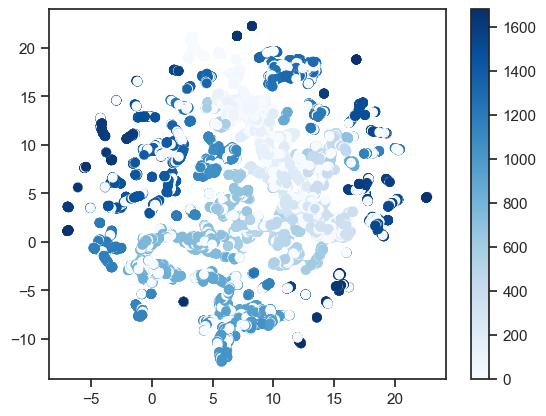

In [35]:
# 클러스터링 결과 시각화 함수 (노이즈 포함)
def visualization_data(clustering_result) :
    import matplotlib.pyplot as plt

    # UMAP으로 축소된 데이터를 x, y로 나누어서 저장
    x = clustering_result['UMAP1']
    y = clustering_result['UMAP2']

    # OPTICS 클러스터링 결과를 c로 지정하여 그래프 그리기
    c = clustering_result['OPTICS_cluster_all']
    plt.scatter(x, y, c=c, cmap='Blues')
    plt.colorbar()
    plt.show();

get_all_optics_v = visualization_data(get_all_optics)
get_all_optics_v

In [36]:
# 노이즈 포인트를 제외한 클러스터링 결과
def get_without_noise_optics(train_df_umap) :
    from sklearn.cluster import OPTICS

    # OPTICS 객체 생성 및 매개 변수 설정 (min_samples, xi, min_cluster_size 등)
    optics_clustering = OPTICS()

    # cluster_all 매개 변수 설정
    optics_clustering.cluster_all = False

    # UMAP으로 축소된 데이터(train_df_umap)에 OPTICS 적용
    optics_clustering.fit(train_df_umap)

    # 클러스터링 결과를 train_df_umap DataFrame에 추가
    train_df_umap['OPTICS_cluster_without_noise'] = optics_clustering.labels_
    train_df_umap = train_df_umap[train_df_umap['OPTICS_cluster_without_noise'] != -1]  # 노이즈 포인트 제거
    
    return train_df_umap

get_without_noise_optics = get_without_noise_optics(train_df_umap)
get_without_noise_optics

,UMAP1,UMAP2,OPTICS_cluster_all,OPTICS_cluster_without_noise
지번주소,,,,
서울특별시 광진구 광장동 102,3.575164,19.988613,0,0
서울특별시 광진구 광장동 104,3.587328,19.958639,0,0
서울특별시 광진구 광장동 105,3.576152,19.929106,0,0
서울특별시 광진구 광장동 106,3.587862,19.983940,0,0
서울특별시 광진구 광장동 107,3.591900,20.011518,0,0
...,...,...,...,...
서울특별시 광진구 화양동 95-1,6.637370,9.533938,-1,476
서울특별시 광진구 화양동 95-5,6.686719,9.534225,-1,476
서울특별시 광진구 화양동 96-2,6.654298,9.572281,-1,476


In [144]:
get_without_noise_optics.to_csv('C:/Python_practice/DL_project/gwangjin_contest/EDA/MinMaxScaled_UMAP_OPTICS.csv')

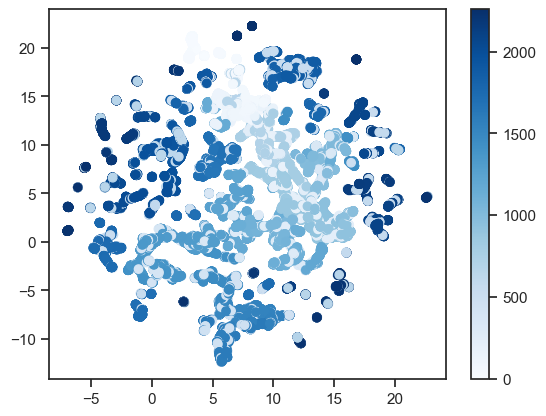

In [38]:
# 클러스터링 결과 시각화 함수 (노이즈 제거)
def visualization_data(clustering_result) :
    import matplotlib.pyplot as plt

    # UMAP으로 축소된 데이터를 x, y로 나누어서 저장
    x = clustering_result['UMAP1']
    y = clustering_result['UMAP2']

    # OPTICS 클러스터링 결과를 c로 지정하여 그래프 그리기
    c = clustering_result['OPTICS_cluster_without_noise'] # 변경
    plt.scatter(x, y, c=c, cmap='Blues')
    plt.colorbar()
    plt.show();

get_without_noise_optics_v = visualization_data(get_without_noise_optics)
get_without_noise_optics_v

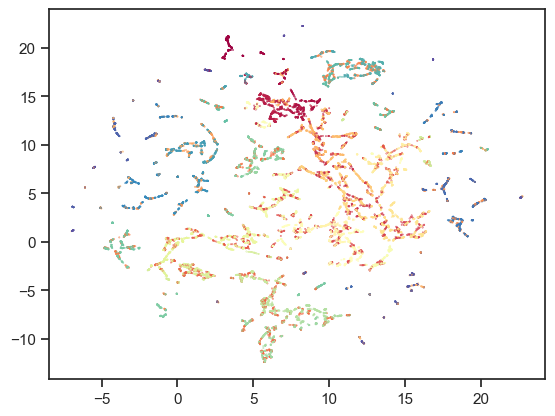

In [46]:
def visualization_data2(clustering_result):
    # 노이즈 포인트 제외
    clustered = (clustering_result >= 0)
    plt.scatter(clustering_result['UMAP1'],
                clustering_result['UMAP2'],
                c=clustering_result['OPTICS_cluster_without_noise'],
                s=0.1,
                cmap='Spectral')
    plt.show()
    
get_without_noise_optics_v2 = visualization_data2(get_without_noise_optics)
get_without_noise_optics_v2


# 4. 군집화 평가 (실루엣 점수)

### 1) 노이즈 제거 클러스터링 결과 (get_without_noise_optics)

실루엣 점수 : <br>
- 클러스터의 밀집도와 분리도를 모두 고려하여 평가하는 지표<br>
- 범위는 -1 ~ 1 <br>
- 1에 가까울수록 좋은 군집화 결과를 나타냄

In [44]:
def silhouette(clustering_result) : 
    from sklearn.metrics import silhouette_score

    # 클러스터링 결과에서 노이즈 포인트 제외한 데이터와 클러스터 레이블 추출
    X = clustering_result[['UMAP1', 'UMAP2']]
    labels = clustering_result['OPTICS_cluster_without_noise']

    # 실루엣 점수 계산
    silhouette_avg = silhouette_score(X, labels)

    return silhouette_avg

Dunn 지수 (군집화의 일관성) :
- 군집 내의 응집도와 군집 간 분리도를 모두 고려하여 군집화의 품질을 평가
- 클러스터 내 거리와 클러스터 간 거리의 비율을 이용해 계산
- Dunn 지수: Dunn 지수가 0.7 이상 = 잘 분리된 클러스터가 형성 => 클러스터링 결과가 좋다고 평가<br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;= Dunn 지수가 작다는 것은 각 클러스터 간의 거리가 가깝지 않다

In [41]:
from sklearn.metrics import davies_bouldin_score, calinski_harabasz_score
from sklearn.neighbors import DistanceMetric

# Dunn 지수 계산 함수
def dunn(clustering_result):
    dist = DistanceMetric.get_metric('euclidean')
    labels = clustering_result['OPTICS_cluster_without_noise']
    clusters = np.unique(labels)
    centroids = [np.mean(clustering_result.loc[labels==i, ['UMAP1', 'UMAP2']], axis=0) for i in clusters]
    max_intracluster_distances = [np.max(dist.pairwise(clustering_result.loc[labels==i, ['UMAP1', 'UMAP2']])) for i in clusters]
    min_intercluster_distances = []
    for i, c1 in enumerate(centroids):
        for j, c2 in enumerate(centroids):
            if i < j:
                dist_ij = dist.pairwise([c1, c2])[0][1]
                min_intercluster_distances.append(dist_ij)
    return np.min(min_intercluster_distances) / np.max(max_intracluster_distances)

Calinski-Harabasz 지수 (군집화의 분리력) :
- 군집화 결과가 실제로 잘 분리되어 있는지를 판단하는 지표
- 각 군집의 분산이 커질수록, 각 군집 간의 거리가 멀어질수록 높은 값
- Calinski-Harabasz 지수:  100-1000 사이의 값이 좋은 성능

In [42]:
# Calinski-Harabasz 지수 계산 함수
def calinski_harabasz(clustering_result):
    labels = clustering_result['OPTICS_cluster_without_noise']
    return calinski_harabasz_score(clustering_result[['UMAP1', 'UMAP2']], labels)

In [45]:
# Dunn 지수와 Calinski-Harabasz 지수 계산
sil_score = silhouette(get_without_noise_optics)
dunn_score = dunn(get_without_noise_optics)
ch_score = calinski_harabasz(get_without_noise_optics)

# 출력
print(f"실루엣 score: {sil_score}")
print(f"Dunn score: {dunn_score:.4f}")
print(f"Calinski-Harabasz score: {ch_score:.4f}")

C:\Users\dohee\AppData\Roaming\Python\Python39\site-packages\sklearn\neighbors\_distance_metric.py:10: FutureWarning: sklearn.neighbors.DistanceMetric has been moved to sklearn.metrics.DistanceMetric in 1.0. This import path will be removed in 1.3
  warnings.warn(


실루엣 score: 0.463607519865036
Dunn score: 0.0001
Calinski-Harabasz score: 234768.0795
